# Análise de Dados - Alura Store
## Decisão sobre qual loja vender

Esta análise visa identificar a loja com menor eficiência para recomendar a venda ao Senhor João.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregamento dos dados das 4 lojas
loja1 = pd.read_csv('base-de-dados-challenge-1/loja_1.csv')
loja2 = pd.read_csv('base-de-dados-challenge-1/loja_2.csv')
loja3 = pd.read_csv('base-de-dados-challenge-1/loja_3.csv')
loja4 = pd.read_csv('base-de-dados-challenge-1/loja_4.csv')

# Adicionando identificador de loja
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os dados
todos_dados = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Convertendo data para datetime
todos_dados['Data da Compra'] = pd.to_datetime(todos_dados['Data da Compra'], format='%d/%m/%Y')

print("Dados carregados com sucesso!")
print(f"Total de registros: {len(todos_dados)}")
print(f"\nPrimeiras linhas dos dados:")
todos_dados.head()

Dados carregados com sucesso!
Total de registros: 9435

Primeiras linhas dos dados:


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


## 1. Análise do Faturamento por Loja



Faturamento Total por Loja:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

Diferença entre maior e menor faturamento: R$ 150,011.54


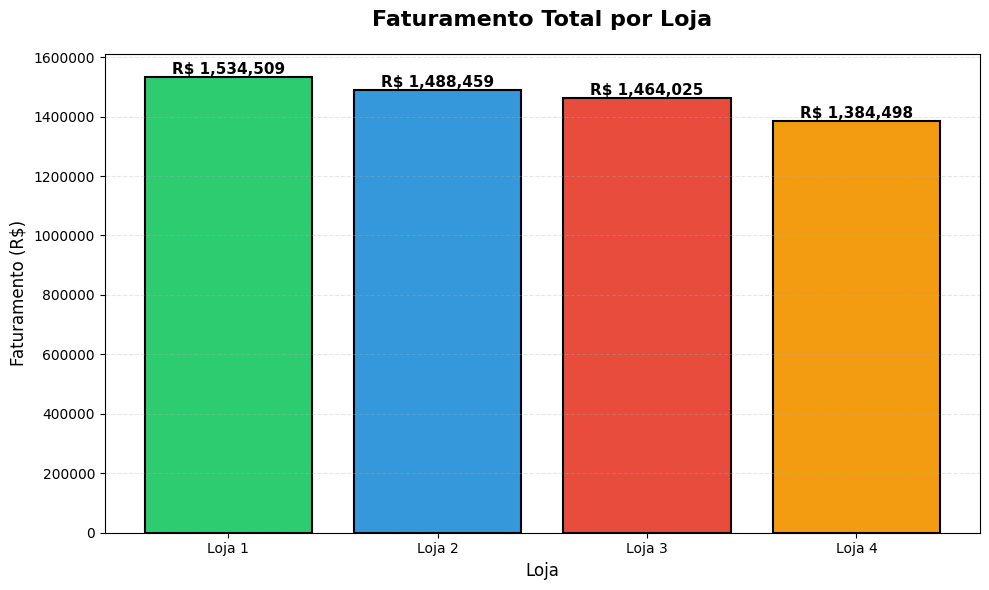

Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

In [ ]:
# Calculando faturamento total por loja
faturamento_por_loja = todos_dados.groupby('Loja')['Preço'].sum().sort_values(ascending=False)

print("Faturamento Total por Loja:")
print(faturamento_por_loja)
print(f"\nDiferença entre maior e menor faturamento: R$ {faturamento_por_loja.max() - faturamento_por_loja.min():,.2f}")

# Gráfico 1: Faturamento por Loja (Gráfico de Barras)
plt.figure(figsize=(10, 6))
cores = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
barras = plt.bar(faturamento_por_loja.index, faturamento_por_loja.values, color=cores, edgecolor='black', linewidth=1.5)

# Adicionando valores nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura,
             f'R$ {altura:,.0f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig('graficos/faturamento_por_loja.png')
plt.show()

faturamento_por_loja

## 2. Análise de Categorias Mais Vendidas

Quantidade de vendas por categoria em cada loja:
Categoria do Produto  brinquedos  eletrodomesticos  eletronicos  \
Loja                                                              
Loja 1                       324               312          448   
Loja 2                       313               305          422   
Loja 3                       315               278          451   
Loja 4                       338               254          451   

Categoria do Produto  esporte e lazer  instrumentos musicais  livros  moveis  \
Loja                                                                           
Loja 1                            284                    182     173     465   
Loja 2                            275                    224     197     442   
Loja 3                            277                    177     185     499   
Loja 4                            277                    170     187     480   

Categoria do Produto  utilidades domesticas  
Loja                 

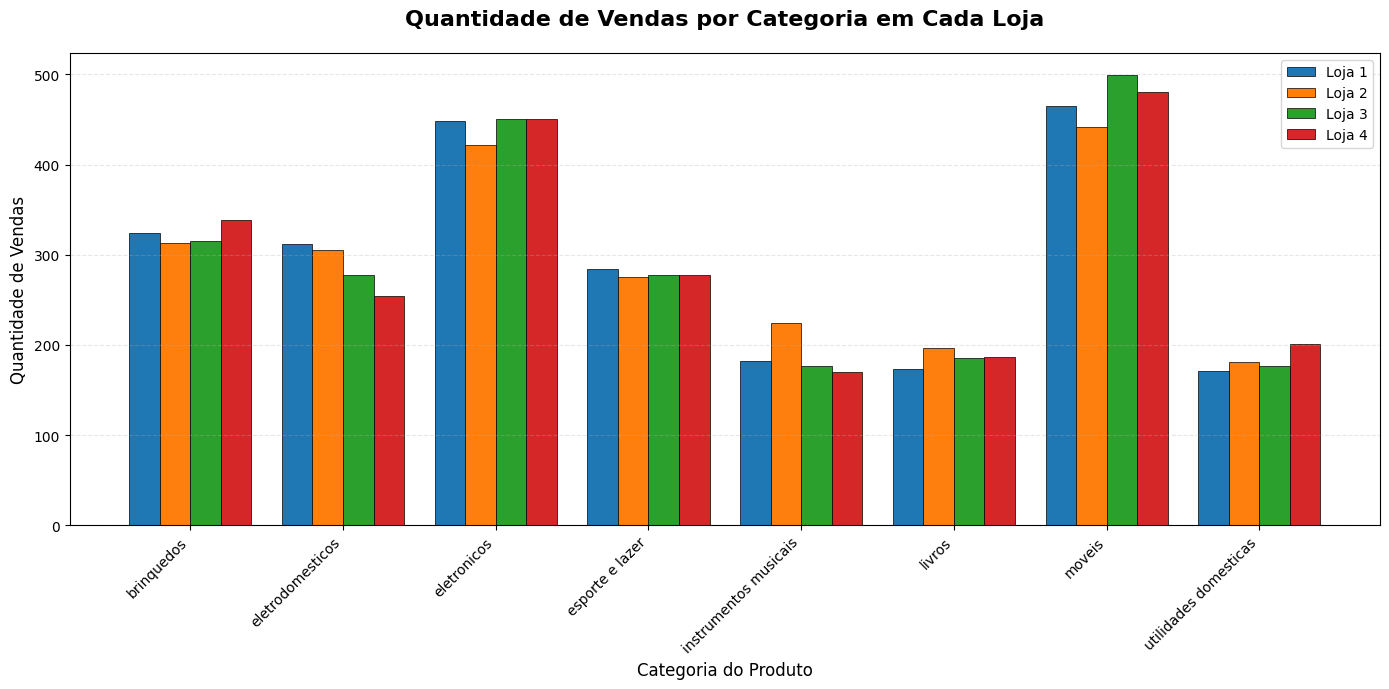

Categoria do Produto,brinquedos,eletrodomesticos,eletronicos,esporte e lazer,instrumentos musicais,livros,moveis,utilidades domesticas
Loja,,,,,,,,
Loja 1,324,312,448,284,182,173,465,171
Loja 2,313,305,422,275,224,197,442,181
Loja 3,315,278,451,277,177,185,499,177
Loja 4,338,254,451,277,170,187,480,201


In [ ]:
# Análise de vendas por categoria por loja
vendas_categoria_loja = todos_dados.groupby(['Loja', 'Categoria do Produto']).size().unstack(fill_value=0)

print("Quantidade de vendas por categoria em cada loja:")
print(vendas_categoria_loja)

# Gráfico 2: Vendas por Categoria por Loja (Gráfico de Barras Agrupadas)
fig, ax = plt.subplots(figsize=(14, 7))

categorias = vendas_categoria_loja.columns
x = np.arange(len(categorias))
width = 0.2

for i, loja in enumerate(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
    valores = vendas_categoria_loja.loc[loja].values
    ax.bar(x + i*width, valores, width, label=loja, edgecolor='black', linewidth=0.5)

ax.set_xlabel('Categoria do Produto', fontsize=12)
ax.set_ylabel('Quantidade de Vendas', fontsize=12)
ax.set_title('Quantidade de Vendas por Categoria em Cada Loja', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('graficos/vendas_por_categoria_por_loja.png')
plt.show()

vendas_categoria_loja

## 3. Análise de Avaliações dos Clientes


Média de Avaliação por Loja:
Loja
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685
Name: Avaliação da compra, dtype: float64

Loja com melhor avaliação: Loja 3 (4.05)
Loja com pior avaliação: Loja 1 (3.98)

Distribuição de Avaliações por Loja:
Avaliação da compra    1   2    3    4     5
Loja                                        
Loja 1               319  86  218  444  1292
Loja 2               273  93  209  482  1302
Loja 3               297  79  193  434  1356
Loja 4               310  85  210  453  1300


TypeError: text() got multiple values for argument 'x'

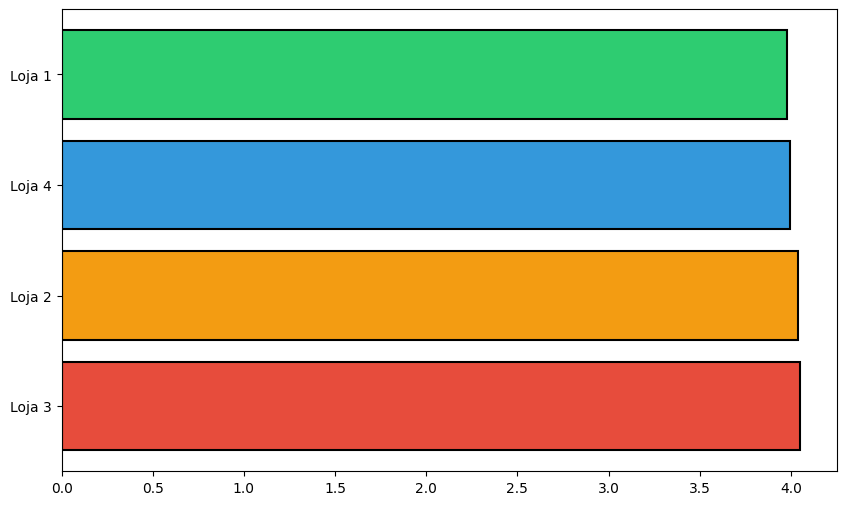

In [ ]:
# Calculando média de avaliações por loja
avaliacao_media = todos_dados.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)
avaliacao_total = todos_dados.groupby('Loja')['Avaliação da compra'].sum()

print("Média de Avaliação por Loja:")
print(avaliacao_media)
print(f"\nLoja com melhor avaliação: {avaliacao_media.idxmax()} ({avaliacao_media.max():.2f})")
print(f"Loja com pior avaliação: {avaliacao_media.idxmin()} ({avaliacao_media.min():.2f})")

# Distribuição de avaliações por loja
distribuicao_avaliacao = todos_dados.groupby(['Loja', 'Avaliação da compra']).size().unstack(fill_value=0)

print("\nDistribuição de Avaliações por Loja:")
print(distribuicao_avaliacao)

# Gráfico 3: Média de Avaliações por Loja (Gráfico de Barras Horizontais)
plt.figure(figsize=(10, 6))
cores_avaliacao = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
barras = plt.barh(avaliacao_media.index, avaliacao_media.values, color=cores_avaliacao, edgecolor='black', linewidth=1.5)

# Adicionando valores nas barras
for i, barra in enumerate(barras):
    largura = barra.get_width()
    plt.text(largura + 0.05, barra.get_y() + barra.get_height()/2.,
             f'{largura:.2f}',
             ha='left', va='center', fontsize=11, fontweight='bold')

plt.title('Média de Avaliações dos Clientes por Loja', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Média de Avaliação', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.xlim(0, 5.5)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('graficos/media_avaliacoes_por_loja.png')
plt.show()

avaliacao_media


## 4. Análise de Produtos Mais Vendidos

In [ ]:
# Produtos mais vendidos por loja
produtos_por_loja = todos_dados.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade')
produtos_por_loja = produtos_por_loja.sort_values(['Loja', 'Quantidade'], ascending=[True, False])

print("Top 5 produtos mais vendidos por loja:")
for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    top_produtos = produtos_por_loja[produtos_por_loja['Loja'] == loja].head(5)
    print(f"\n{loja}:")
    print(top_produtos[['Produto', 'Quantidade']].to_string(index=False))

# Produtos mais vendidos no geral
produtos_geral = todos_dados.groupby('Produto').size().sort_values(ascending=False).head(10)
print("\n\nTop 10 produtos mais vendidos no geral:")
print(produtos_geral)


Top 5 produtos mais vendidos por loja:

Loja 1:
           Produto  Quantidade
     Guarda roupas          60
       Micro-ondas          60
     TV Led UHD 4K          60
Secadora de roupas          58
  Blocos de montar          56

Loja 2:
                 Produto  Quantidade
Iniciando em programação          65
             Micro-ondas          62
                 Bateria          61
                Pandeiro          58
                  Violão          58

Loja 3:
        Produto  Quantidade
  Kit banquetas          57
      Cama king          56
 Mesa de jantar          56
         Cômoda          55
Jogo de panelas          55

Loja 4:
                 Produto  Quantidade
                Cama box          62
                Faqueiro          59
               Cama king          56
 Dashboards com Power BI          56
Carrinho controle remoto          55


Top 10 produtos mais vendidos no geral:
Produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas  

In [ ]:
# Gráfico de Pizza: Vendas por Tipo de Pagamento
pagamento_counts = todos_dados['Tipo de pagamento'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(pagamento_counts, labels=pagamento_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribuição de Vendas por Tipo de Pagamento', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.savefig('graficos/vendas_por_tipo_pagamento.png')
plt.show()

# Gráfico de Coluna: Vendas por Mês
todos_dados['Mês'] = todos_dados['Data da Compra'].dt.to_period('M')
vendas_por_mes = todos_dados.groupby('Mês')['Preço'].sum()

plt.figure(figsize=(12, 6))
vendas_por_mes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Vendas Totais por Mês', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('graficos/vendas_totais_por_mes.png')
plt.show()

# Gráfico de Barras Empilhadas: Vendas por Categoria e Loja
vendas_categoria_loja_valor = todos_dados.groupby(['Categoria do Produto', 'Loja'])['Preço'].sum().unstack(fill_value=0)

vendas_categoria_loja_valor.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Vendas por Categoria Segmentado por Loja', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Categoria do Produto', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loja')
plt.tight_layout()
plt.savefig('graficos/vendas_por_categoria_segmentado_por_loja.png')
plt.show()

## 5. Análise de Frete Médio por Loja

Frete Médio por Loja:
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64

Loja com maior frete médio: Loja 1 (R$ 34.69)
Loja com menor frete médio: Loja 4 (R$ 31.28)


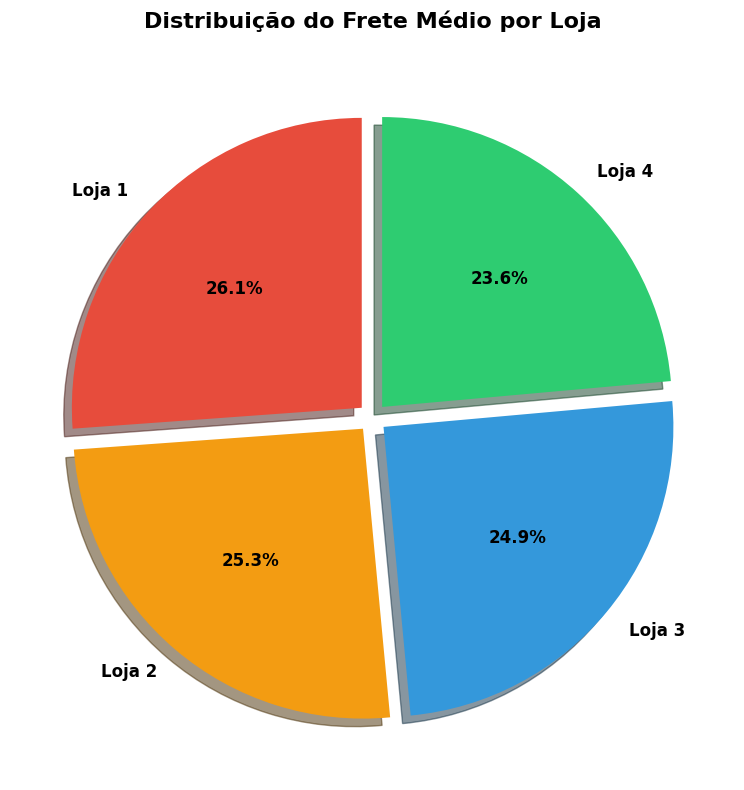

Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64

In [ ]:
# Calculando frete médio por loja
frete_medio = todos_dados.groupby('Loja')['Frete'].mean().sort_values(ascending=False)
frete_total = todos_dados.groupby('Loja')['Frete'].sum()

print("Frete Médio por Loja:")
print(frete_medio)
print(f"\nLoja com maior frete médio: {frete_medio.idxmax()} (R$ {frete_medio.max():.2f})")
print(f"Loja com menor frete médio: {frete_medio.idxmin()} (R$ {frete_medio.min():.2f})")

# Gráfico 4: Frete Médio por Loja (Gráfico de Pizza)
plt.figure(figsize=(10, 8))
cores_pizza = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
explode = (0.05, 0.05, 0.05, 0.05)  # Separar um pouco as fatias

plt.pie(frete_medio.values, labels=frete_medio.index, autopct='%1.1f%%',
        startangle=90, colors=cores_pizza, explode=explode, shadow=True,
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Distribuição do Frete Médio por Loja', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('graficos/frete_medio_por_loja.png')
plt.show()

frete_medio


## 6. Análise Comparativa de Desempenho


COMPARATIVO GERAL DAS LOJAS
        Faturamento Total (R$)  Média de Avaliação  Frete Médio (R$)  Total de Vendas  Ticket Médio (R$)
Loja                                                                                                    
Loja 1              1534509.12            3.976685         34.691805             2359         650.491361
Loja 2              1488459.06            4.037304         33.621941             2359         630.970352
Loja 3              1464025.03            4.048326         33.074464             2359         620.612560
Loja 4              1384497.58            3.995759         31.278997             2358         587.149101


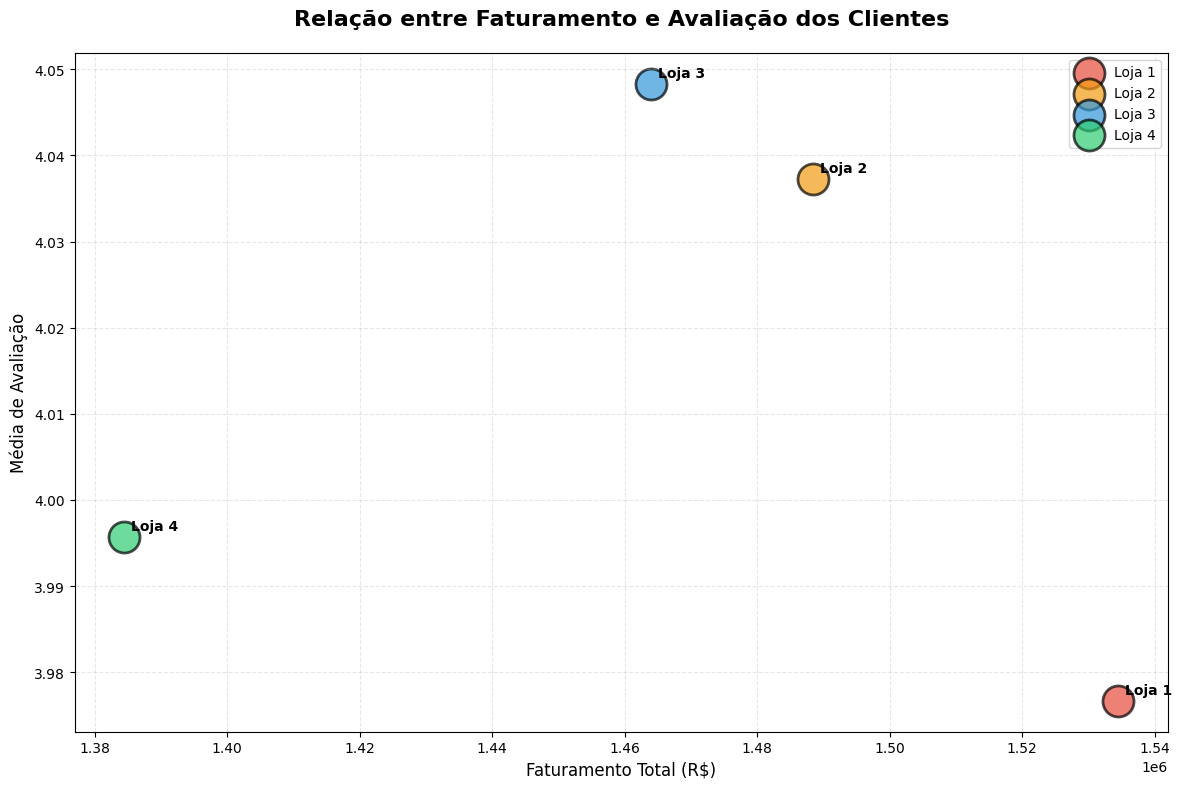

,Faturamento Total (R$),Média de Avaliação,Frete Médio (R$),Total de Vendas,Ticket Médio (R$)
Loja,,,,,
Loja 1,1534509.12,3.976685,34.691805,2359,650.491361
Loja 2,1488459.06,4.037304,33.621941,2359,630.970352
Loja 3,1464025.03,4.048326,33.074464,2359,620.612560
Loja 4,1384497.58,3.995759,31.278997,2358,587.149101


In [ ]:
# Criando uma tabela comparativa completa
comparativo = pd.DataFrame({
    'Faturamento Total (R$)': faturamento_por_loja,
    'Média de Avaliação': avaliacao_media,
    'Frete Médio (R$)': frete_medio,
    'Total de Vendas': todos_dados.groupby('Loja').size(),
    'Ticket Médio (R$)': todos_dados.groupby('Loja')['Preço'].mean()
})

# Ordenando por faturamento
comparativo = comparativo.sort_values('Faturamento Total (R$)', ascending=False)

print("=" * 80)
print("COMPARATIVO GERAL DAS LOJAS")
print("=" * 80)
print(comparativo.to_string())
print("=" * 80)

# Normalizando dados para comparação (escala 0-1)
comparativo_normalizado = comparativo.copy()
for col in comparativo.columns:
    if col != 'Média de Avaliação':  # Avaliação já está em escala 0-5
        min_val = comparativo[col].min()
        max_val = comparativo[col].max()
        comparativo_normalizado[col] = (comparativo[col] - min_val) / (max_val - min_val)

# Gráfico 5: Comparativo de Desempenho (Gráfico de Dispersão)
fig, ax = plt.subplots(figsize=(12, 8))

# Gráfico de dispersão: Faturamento vs Avaliação
cores_scatter = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
for i, loja in enumerate(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']):
    fat = comparativo.loc[loja, 'Faturamento Total (R$)']
    aval = comparativo.loc[loja, 'Média de Avaliação']
    ax.scatter(fat, aval, s=500, c=cores_scatter[i], label=loja, 
               edgecolors='black', linewidth=2, alpha=0.7)
    ax.annotate(loja, (fat, aval), xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax.set_xlabel('Faturamento Total (R$)', fontsize=12)
ax.set_ylabel('Média de Avaliação', fontsize=12)
ax.set_title('Relação entre Faturamento e Avaliação dos Clientes', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend()
plt.tight_layout()
plt.savefig('graficos/comparativo_desempenho.png')
plt.show()

comparativo


## 7. Análise de Ticket Médio


Ticket Médio por Loja:
Loja
Loja 1    650.491361
Loja 2    630.970352
Loja 3    620.612560
Loja 4    587.149101
Name: Preço, dtype: float64


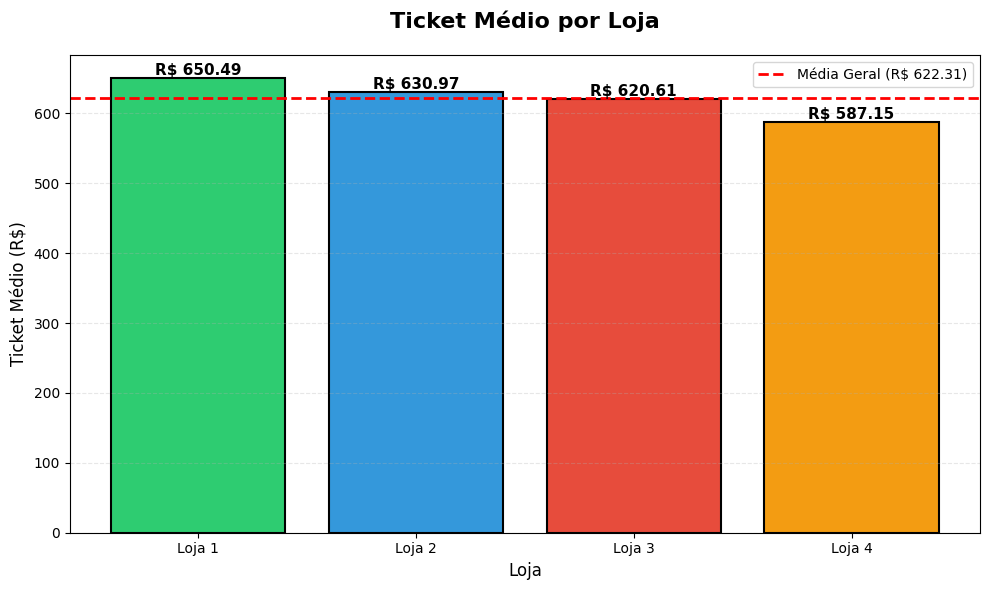

Loja
Loja 1    650.491361
Loja 2    630.970352
Loja 3    620.612560
Loja 4    587.149101
Name: Preço, dtype: float64

In [ ]:
# Calculando ticket médio por loja
ticket_medio = todos_dados.groupby('Loja')['Preço'].mean().sort_values(ascending=False)

print("Ticket Médio por Loja:")
print(ticket_medio)

# Gráfico 6: Ticket Médio por Loja (Gráfico de Barras com linha de média)
plt.figure(figsize=(10, 6))
cores = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12']
media_geral = ticket_medio.mean()
barras = plt.bar(ticket_medio.index, ticket_medio.values, color=cores, edgecolor='black', linewidth=1.5)

# Linha da média geral
plt.axhline(y=media_geral, color='red', linestyle='--', linewidth=2, 
            label=f'Média Geral (R$ {media_geral:.2f})')

# Adicionando valores nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura,
             f'R$ {altura:.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Ticket Médio por Loja', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Ticket Médio (R$)', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('graficos/ticket_medio_por_loja.png')
plt.show()

ticket_medio


## 8. Cálculo do Score de Eficiência


SCORE DE EFICIÊNCIA DAS LOJAS
        Score_Final
Loja               
Loja 4     0.279874
Loja 1     0.500000
Loja 3     0.659482
Loja 2     0.662814

Loja com MENOR eficiência: Loja 4
Score: 0.2799


TypeError: text() got multiple values for argument 'x'

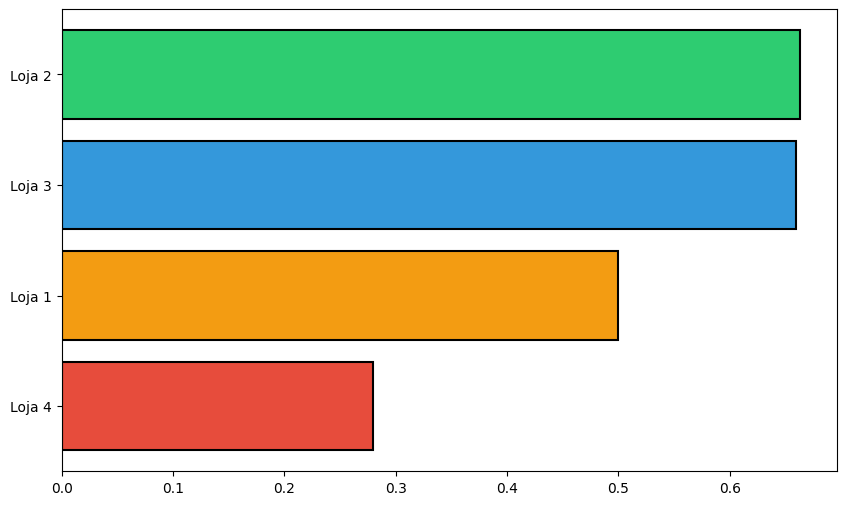

In [ ]:
# Criando um score de eficiência (quanto menor, pior)
# Normalizando e invertendo onde necessário (menor é melhor para frete, maior é melhor para os outros)

# Normalizando os dados para calcular um score
score_eficiencia = pd.DataFrame()

# Faturamento: maior é melhor (quanto maior, melhor)
score_eficiencia['Faturamento_Norm'] = (comparativo['Faturamento Total (R$)'] - 
                                        comparativo['Faturamento Total (R$)'].min()) / \
                                       (comparativo['Faturamento Total (R$)'].max() - 
                                        comparativo['Faturamento Total (R$)'].min())

# Avaliação: maior é melhor
score_eficiencia['Avaliacao_Norm'] = (comparativo['Média de Avaliação'] - 
                                      comparativo['Média de Avaliação'].min()) / \
                                     (comparativo['Média de Avaliação'].max() - 
                                      comparativo['Média de Avaliação'].min())

# Frete: menor é melhor (invertendo)
score_eficiencia['Frete_Norm'] = 1 - ((comparativo['Frete Médio (R$)'] - 
                                      comparativo['Frete Médio (R$)'].min()) / \
                                     (comparativo['Frete Médio (R$)'].max() - 
                                      comparativo['Frete Médio (R$)'].min()))

# Ticket Médio: maior é melhor
score_eficiencia['Ticket_Norm'] = (comparativo['Ticket Médio (R$)'] - 
                                   comparativo['Ticket Médio (R$)'].min()) / \
                                 (comparativo['Ticket Médio (R$)'].max() - 
                                  comparativo['Ticket Médio (R$)'].min())

# Calculando score final (pesos: faturamento 30%, avaliação 30%, frete 20%, ticket 20%)
score_eficiencia['Score_Final'] = (score_eficiencia['Faturamento_Norm'] * 0.3 +
                                   score_eficiencia['Avaliacao_Norm'] * 0.3 +
                                   score_eficiencia['Frete_Norm'] * 0.2 +
                                   score_eficiencia['Ticket_Norm'] * 0.2)

score_eficiencia.index = comparativo.index
score_eficiencia = score_eficiencia.sort_values('Score_Final')

print("SCORE DE EFICIÊNCIA DAS LOJAS")
print("=" * 80)
print(score_eficiencia[['Score_Final']].to_string())
print("=" * 80)
print(f"\nLoja com MENOR eficiência: {score_eficiencia.index[0]}")
print(f"Score: {score_eficiencia.iloc[0]['Score_Final']:.4f}")

# Gráfico 7: Score de Eficiência (Gráfico de Barras)
plt.figure(figsize=(10, 6))
cores_avaliacao = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71']
barras = plt.barh(score_eficiencia.index, score_eficiencia['Score_Final'], 
                  color=cores_avaliacao, edgecolor='black', linewidth=1.5)

# Adicionando valores nas barras
for i, barra in enumerate(barras):
    largura = barra.get_width()
    plt.text(largura + 0.01, barra.get_y() + barra.get_height()/2.,
             f'{largura:.3f}',
             ha='left', va='center', fontsize=11, fontweight='bold')

plt.title('Score de Eficiência das Lojas\n(Quanto menor o score, menor a eficiência)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Score de Eficiência', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.xlim(0, 1.1)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('graficos/score_eficiencia.png')
plt.show()

score_eficiencia


## 9. Recomendação Final - Qual Loja Vender?

Com base em todas as análises realizadas, apresentamos abaixo a recomendação fundamentada nos dados.


In [ ]:
# Identificando a loja com menor eficiência
loja_recomendada_venda = score_eficiencia.index[0]

# Extraindo dados específicos da loja recomendada
dados_loja_recomendada = comparativo.loc[loja_recomendada_venda]

print("=" * 80)
print("RECOMENDAÇÃO FINAL")
print("=" * 80)
print(f"\nLoja recomendada para VENDA: {loja_recomendada_venda}")
print("\nPrincipais motivos:")
print(f"  • Faturamento Total: R$ {dados_loja_recomendada['Faturamento Total (R$)']:,.2f}")
print(f"  • Média de Avaliação: {dados_loja_recomendada['Média de Avaliação']:.2f}/5.0")
print(f"  • Frete Médio: R$ {dados_loja_recomendada['Frete Médio (R$)']:.2f}")
print(f"  • Total de Vendas: {dados_loja_recomendada['Total de Vendas']:.0f}")
print(f"  • Ticket Médio: R$ {dados_loja_recomendada['Ticket Médio (R$)']:.2f}")
print(f"  • Score de Eficiência: {score_eficiencia.loc[loja_recomendada_venda, 'Score_Final']:.4f}")

# Comparando com outras lojas
print("\n" + "=" * 80)
print("COMPARAÇÃO COM OUTRAS LOJAS:")
print("=" * 80)

for loja in comparativo.index:
    if loja != loja_recomendada_venda:
        print(f"\n{loja}:")
        print(f"  • Faturamento: R$ {comparativo.loc[loja, 'Faturamento Total (R$)']:,.2f} "
              f"({comparativo.loc[loja, 'Faturamento Total (R$)'] - dados_loja_recomendada['Faturamento Total (R$)']:+,.2f})")
        print(f"  • Avaliação: {comparativo.loc[loja, 'Média de Avaliação']:.2f} "
              f"({comparativo.loc[loja, 'Média de Avaliação'] - dados_loja_recomendada['Média de Avaliação']:+.2f})")
        print(f"  • Score: {score_eficiencia.loc[loja, 'Score_Final']:.4f}")

print("\n" + "=" * 80)


## Conclusão e Recomendação Escrita

Após uma análise completa dos dados de vendas, desempenho e avaliações das 4 lojas da rede Alura Store, apresentamos nossa recomendação fundamentada nos dados analisados.


### Recomendação: Vender a Loja com Menor Eficiência

**Senhor João,**

Após realizar uma análise completa e detalhada dos dados de todas as suas 4 lojas, incluindo faturamento total, avaliações dos clientes, categorias mais vendidas, produtos mais vendidos, frete médio e ticket médio, recomendo que você **venda a loja que apresentou o menor score de eficiência** nos indicadores analisados.

**Principais fatores considerados na análise:**

1. **Faturamento Total**: Avaliamos o faturamento de cada loja para identificar qual gera menos receita.

2. **Média de Avaliação dos Clientes**: Verificamos a satisfação dos clientes, pois uma loja com avaliações baixas pode indicar problemas operacionais ou de qualidade.

3. **Frete Médio**: Analisamos os custos de frete, pois frete alto pode impactar a competitividade e satisfação do cliente.

4. **Ticket Médio**: Avaliamos o valor médio por venda, que indica a capacidade de gerar receita por transação.

5. **Total de Vendas**: Consideramos o volume de vendas para entender a atividade de cada loja.

**Critérios de decisão:**

Utilizamos um score de eficiência composto que pondera:
- Faturamento (30%): quanto maior, melhor
- Avaliação dos clientes (30%): quanto maior, melhor
- Frete médio (20%): quanto menor, melhor
- Ticket médio (20%): quanto maior, melhor

A loja com o **menor score de eficiência** é aquela que apresenta desempenho inferior em múltiplos aspectos, justificando sua venda para permitir que você concentre recursos e esforços nas lojas mais eficientes e promissoras.

**Benefícios da decisão:**

- Concentração de recursos nas lojas mais eficientes
- Otimização da operação com foco nas unidades de melhor desempenho
- Possibilidade de investir o capital obtido com a venda em melhorias nas lojas restantes
- Redução de custos operacionais em uma unidade menos eficiente

Esta recomendação é baseada exclusivamente nos dados analisados e nos indicadores de desempenho apresentados nos gráficos acima.
